In [2]:
import pandas as pd

In [3]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [4]:
dtype_dict = {
    "fare_amount": "float32",
    "pickup_longitude": "float32",
    "pickup_latitude": "float32",
    "dropoff_longitude": "float32",
    "dropoff_latitude": "float32",
    "passenger_count": "int8"
}

In [5]:
# 데이터 불러오기
file_path = "C://Users/302-24/Downloads/new-york-city-taxi-fare-prediction/train.csv"
df = pd.read_csv(file_path, dtype=dtype_dict)

In [6]:
print(df.head())

                             key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844315        40.721317         -73.841614         40.712276   
1        -74.016045        40.711304         -73.979271         40.782005   
2        -73.982735        40.761269         -73.991241         40.750561   
3        -73.987129        40.733143         -73.991570         40.758091   
4        -73.968094        40.768009         -73.956657         40.783764   

   passenger_count  
0                1  
1                1  
2                2  
3       

In [7]:
print(df.info())  # 메모리 사용량 줄어든 것 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float32
 2   pickup_datetime    object 
 3   pickup_longitude   float32
 4   pickup_latitude    float32
 5   dropoff_longitude  float32
 6   dropoff_latitude   float32
 7   passenger_count    int8   
dtypes: float32(5), int8(1), object(2)
memory usage: 1.9+ GB
None


In [8]:
print(df.shape)  # (행 개수, 열 개수)

(55423856, 8)


In [38]:
# 랜덤하게 50,000개 샘플링

df_sample = df.sample(n=50000, random_state=42)
print(df_sample.shape)

(50000, 8)


In [39]:
# 결측치 확인 및 처리
print(df_sample.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [40]:
# 결측치가 있는 행 제거 (필요하면 다른 방법 사용 가능)

In [41]:
df = df_sample.dropna()

In [42]:
# 결측치 확인 및 처리
print(df_sample.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [76]:
df_sample.describe()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance_miles,log_trip_distance,pickup_hour,pickup_dayofweek,fare_predicted
count,49790,49790.000000,49790.000000,49790.000000,49790.000000,49790.000000,49790.000000,49790.000000,49790.000000,49790.000000,49790.000000,49790.000000
mean,2012-03-19 00:34:00.456497920,11.291172,-72.565409,39.948290,-72.575580,39.902151,1.679976,13.249204,0.955437,13.452039,3.031472,11.291713
min,2009-01-01 00:53:26.000000300,0.010000,-735.483332,-74.008970,-90.239125,-3114.304848,1.000000,0.000000,0.000000,0.000000,0.000000,2.138362
25%,2010-08-16 10:17:45.000000512,6.000000,-73.992230,40.734634,-73.991554,40.733986,1.000000,0.757084,0.563655,9.000000,1.000000,7.637858
50%,2012-03-16 18:35:30.000000256,8.500000,-73.981936,40.752723,-73.980119,40.753097,1.000000,1.317992,0.840701,14.000000,3.000000,10.220848
75%,2013-10-15 08:52:45.000000512,12.500000,-73.967233,40.767197,-73.963879,40.768018,2.000000,2.414292,1.227970,19.000000,5.000000,13.829033
max,2015-06-30 22:43:38.000000100,165.000000,40.808197,47.890090,40.814702,401.900000,6.000000,5394.349978,8.593293,23.000000,6.000000,82.796410
std,NaN,9.497894,10.705446,6.055897,10.202026,15.453452,1.296142,239.032480,0.645582,6.521378,1.952887,6.027068


In [49]:
# 데이터 타입 변환 (날짜)
if 'pickup_datetime' in df_sample.columns:
    df['pickup_datetime'] = pd.to_datetime(df_sample['pickup_datetime'])

In [51]:
# 필요한 컬럼 추출

lat1 = df_sample["pickup_latitude"]
lon1 = df_sample["pickup_longitude"]
lat2 = df_sample["dropoff_latitude"]
lon2 = df_sample["dropoff_longitude"]

In [52]:
import numpy as np

def haversine_np(lat1, lon1, lat2, lon2):
    R = 3959  # 지구 반지름 (마일)
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# 벡터 연산을 이용한 거리 계산
df_sample["trip_distance_miles"] = haversine_np(df_sample["pickup_latitude"].to_numpy(),
                                         df_sample["pickup_longitude"].to_numpy(),
                                         df_sample["dropoff_latitude"].to_numpy(),
                                         df_sample["dropoff_longitude"].to_numpy())

In [55]:
print(df_sample.columns)  # 현재 데이터프레임의 컬럼 목록 출력

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance_miles'],
      dtype='object')


In [58]:
import numpy as np

# 로그 변환된 거리 추가 (log(1 + x) 사용)
df_sample["log_trip_distance"] = np.log1p(df_sample["trip_distance_miles"])

# 변환된 값 확인
print(df_sample[["trip_distance_miles", "log_trip_distance"]].head(10))

          trip_distance_miles  log_trip_distance
10478479             0.416460           0.348161
2240033              0.933263           0.659209
24966385             0.347873           0.298528
38721384             8.125229           2.211043
41464765             1.971073           1.088923
37752606             0.476506           0.389679
45028673             0.808277           0.592375
21489360             2.258485           1.181262
22628060             4.191039           1.646934
2187925              0.974062           0.680093


In [61]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd

# 문자열을 datetime 형식으로 변환
df_sample["key"] = pd.to_datetime(df_sample["key"])

# 날짜 (YYYY-MM-DD) 추출
df_sample["pickup_date"] = df_sample["key"].dt.date  

# 시간 (Hour) 추출
df_sample["pickup_hour"] = df_sample["key"].dt.hour  

# 요일을 숫자로 변환 (0=월요일, 6=일요일)
df_sample["pickup_dayofweek"] = df_sample["key"].dt.dayofweek  

# 결과 출력
print(df_sample)

                                   key  fare_amount          pickup_datetime  \
10478479 2010-01-16 20:06:00.000000168          3.3  2010-01-16 20:06:00 UTC   
2240033  2010-09-22 23:21:00.000000650          6.5  2010-09-22 23:21:00 UTC   
24966385 2013-10-17 18:40:14.000000100          5.0  2013-10-17 18:40:14 UTC   
38721384 2015-06-09 19:39:42.000000900         40.5  2015-06-09 19:39:42 UTC   
41464765 2012-05-01 07:16:59.000000100          7.7  2012-05-01 07:16:59 UTC   
...                                ...          ...                      ...   
35812679 2014-10-26 13:54:00.000000160         15.5  2014-10-26 13:54:00 UTC   
24158073 2012-08-04 22:11:00.000000330          8.5  2012-08-04 22:11:00 UTC   
36392851 2014-11-16 23:35:16.000000200         13.0  2014-11-16 23:35:16 UTC   
51142023 2013-02-14 19:20:00.000000104         13.5  2013-02-14 19:20:00 UTC   
50395300 2012-01-16 01:46:00.000000660          3.7  2012-01-16 01:46:00 UTC   

          pickup_longitude  pickup_lati

In [47]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [73]:
import seaborn as sns

In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 독립 변수(X) & 종속 변수(y) 설정
X = df_sample[["log_trip_distance", "passenger_count", "pickup_hour", "pickup_dayofweek"]]
y = df_sample["fare_amount"]

# 데이터 분리 (학습 & 테스트 데이터 80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scikit-learn 선형 회귀 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 이상치 제거
df_filtered = df_sample[df_sample["trip_distance_miles"] > 20]
# 예측값 계산
y_pred_sklearn = lr_model.predict(X_test)

# 기울기 & 절편 출력
slope_sklearn = lr_model.coef_
intercept_sklearn = lr_model.intercept_

print(f"Sklearn 선형 회귀 결과")
print(f" - 기울기 (Slope): {slope_sklearn}")
print(f" - 절편 (Intercept): {intercept_sklearn:.4f}")

# Statsmodels OLS 학습
X_with_const = sm.add_constant(X)  # OLS에서는 절편을 직접 추가해야 함
ols_model = sm.OLS(y, X_with_const).fit()

# OLS 예측값 계산
y_pred_ols = ols_model.predict(X_with_const)

# OLS 모델 결과 출력
print("Statsmodels OLS 결과")
print(ols_model.summary())

# 모델 성능 평가 (R² Score로 상관계수 평)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
r2_ols = r2_score(y, y_pred_ols)

print(f"Sklearn R² Score: {r2_sklearn:.4f}")
print(f"Statsmodels OLS R² Score: {r2_ols:.4f}")

Sklearn 선형 회귀 결과
 - 기울기 (Slope): [ 9.33788327e+00  6.43338617e-03  5.49769481e-03 -5.16286062e-02]
 - 절편 (Intercept): 2.4417
Statsmodels OLS 결과
                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     7941.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:03:50   Log-Likelihood:            -1.7044e+05
No. Observations:               49790   AIC:                         3.409e+05
Df Residuals:                   49785   BIC:                         3.409e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|     

KeyError: 'fare_actual'

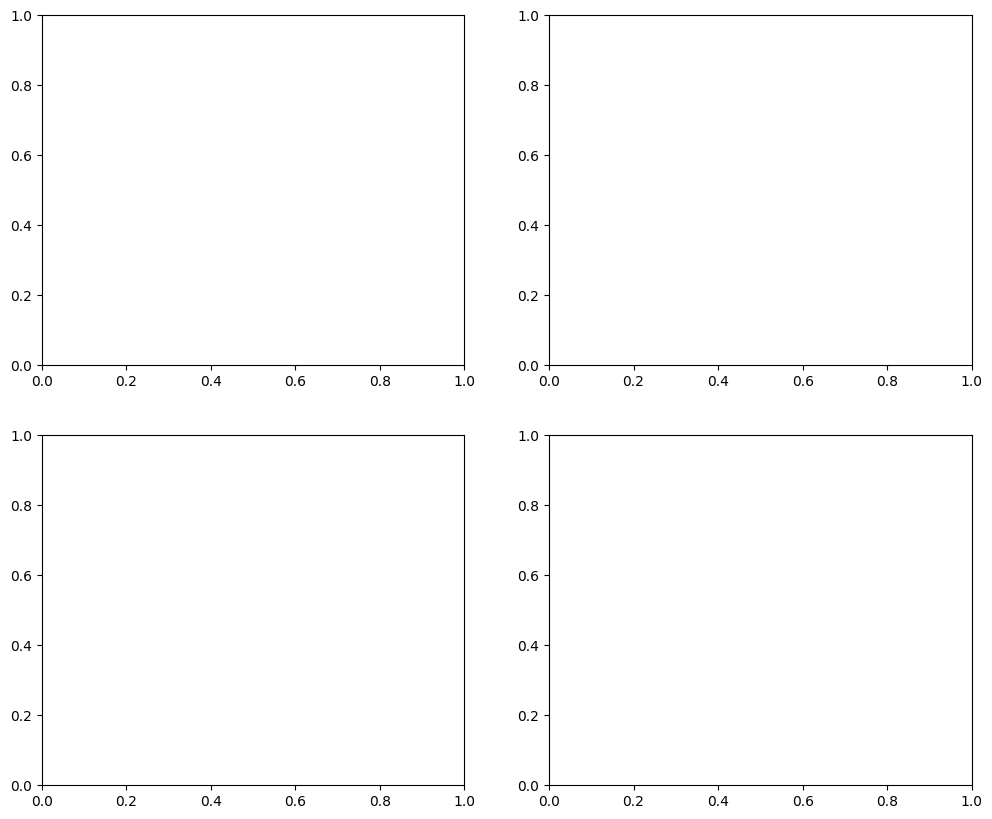

In [75]:
# 회귀식 계수 (가정)
coef = [9.33788327e+00, 6.43338617e-03, 5.49769481e-03, -5.16286062e-02]
intercept = 2.4417

df_sample["fare_predicted"] = (coef[0] * df_sample["log_trip_distance"] +
                        coef[1] * df_sample["passenger_count"] +
                        coef[2] * df_sample["pickup_hour"] +
                        coef[3] * df_sample["pickup_dayofweek"] + intercept)

# 1️X 변수 vs. Y (실제 요금) 산점도 + 회귀선
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = ["log_trip_distance", "passenger_count", "pickup_hour", "pickup_dayofweek"]
titles = ["Log Trip Distance", "Passenger Count", "Pickup Hour", "Pickup Day of Week"]

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.regplot(x=df_sample[feature], y=df_sample["fare_actual"], ax=axes[row, col], line_kws={"color": "red"})
    axes[row, col].set_title(f"{titles[i]} vs. Fare Amount")

plt.tight_layout()
plt.show()

In [25]:
# 회귀 계수(기울기)와 절편 출력
df_filtered = df_filtered.copy()  # 복사본 생성
df_filtered["Predicted_Fare"] = y_pred_log

slope = lr_model_log.coef_[0]  # 기울기
intercept = lr_model_log.intercept_  # 절편
print(f"기울기 (Slope): {slope:.4f}")
print(f"절편 (Intercept): {intercept:.4f}")

# 예측값 출력 (처음 10개만)
df_filtered["Predicted_Fare"] = y_pred_log
print(df_filtered[["log_trip_distance", "fare_amount", "Predicted_Fare"]].head(10))

기울기 (Slope): 13.4328
절편 (Intercept): -1.3450
          log_trip_distance  fare_amount  Predicted_Fare
10478479           0.348026          3.3        3.329963
2240033            0.659156          6.5        7.509305
24966385           0.298370          5.0        2.662946
38721384           2.211043         40.5       28.355457
41464765           1.088899          7.7       13.281949
37752606           0.389698          4.0        3.889738
45028673           0.592351          6.5        6.611918
21489360           1.181236         13.0       14.522286
22628060           1.646931         16.1       20.777866
2187925            0.680108          5.7        7.790744
